In [28]:
import scipy.io
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal
from scipy.fft import fft, fftshift
from scipy.signal import hilbert
from scipy.signal.windows import tukey 
import numpy as np
import vectorised_hf as vhf
import h5py 
from matplotlib import colormaps as cm
from scipy.interpolate import RegularGridInterpolator

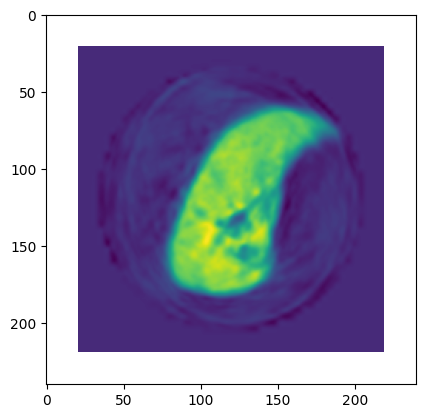

In [29]:
data = h5py.File('heart.h5', 'r')
Image = np.array(data.get('Image'))
Xp = np.array(data.get('Xp'))
Yp = np.array(data.get('Yp'))
data.close()

n = np.size(Xp)
x = int(np.sqrt(n))
Xp = Xp.reshape((x,x))
Yp = Yp.reshape((x,x))

#  Open the mat file
data2 = scipy.io.loadmat('data/25-01-2024-Open-UST-Liver3-SART-07-02-2024.mat', variable_names=['gridVec', 'soundSpeedSART'])
gridVec = data2['gridVec'].flatten('F') # It's square
soundSpeedSART = data2['soundSpeedSART']
intgrid = RegularGridInterpolator((gridVec,gridVec),soundSpeedSART, bounds_error=False)
soundspeedint = intgrid((Xp,Yp))
plt.imshow(soundspeedint)
